In [152]:
import pandas as pd
from scipy.stats import kurtosis, skew

In [153]:
df = pd.read_excel('./sp-500-pe-ratio-price-to-earnings-chart.xlsx')
df

,Macrotrends Data Download,Unnamed: 1
0,NaN,NaN
1,S&amp;P 500 PE Ratio - 90 Year Historical Chart,NaN
2,NaN,NaN
3,DISCLAIMER AND TERMS OF USE: HISTORICAL DATA I...,NaN
4,FOR INFORMATIONAL PURPOSES - NOT FOR TRADING P...,NaN
...,...,...
1144,2022-01-01 00:00:00,22.769
1145,2022-02-01 00:00:00,22.055
1146,2022-03-01 00:00:00,22.8439
1147,2022-04-01 00:00:00,20.8347


In [154]:
df_vals = df.iloc[15:,:]
df_vals.columns.values[1] = 'P/E Ratio'
df_vals

,Macrotrends Data Download,P/E Ratio
15,1927-12-01 00:00:00,15.9099
16,1928-01-01 00:00:00,14.8898
17,1928-02-01 00:00:00,14.6271
18,1928-03-01 00:00:00,16.339
19,1928-04-01 00:00:00,15.8
...,...,...
1144,2022-01-01 00:00:00,22.769
1145,2022-02-01 00:00:00,22.055
1146,2022-03-01 00:00:00,22.8439
1147,2022-04-01 00:00:00,20.8347


In [155]:
df_vals = df_vals.set_index(df_vals.columns[0])
df_vals

/Users/tg/Library/Python/3.9/lib/python/site-packages/pandas/core/indexes/base.py:7587: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,P/E Ratio
Macrotrends Data Download,
1927-12-01,15.9099
1928-01-01,14.8898
1928-02-01,14.6271
1928-03-01,16.339
1928-04-01,15.8
...,...
2022-01-01,22.769
2022-02-01,22.055
2022-03-01,22.8439


In [156]:
df_yr = df_vals.loc['1928-01-01':'1928-12-31']
df_yr

,P/E Ratio
Macrotrends Data Download,
1928-01-01,14.8898
1928-02-01,14.6271
1928-03-01,16.339
1928-04-01,15.8
1928-05-01,16
1928-06-01,15.312
1928-07-01,14.8321
1928-08-01,15.9313
1928-09-01,16.1374


In [157]:
df_yr_mean = df_vals.rolling(window = 12).mean()
df_yr_mean

,P/E Ratio
Macrotrends Data Download,
1927-12-01,NaN
1928-01-01,NaN
1928-02-01,NaN
1928-03-01,NaN
1928-04-01,NaN
...,...
2022-01-01,25.769275
2022-02-01,25.129842
2022-03-01,24.451017


<Axes: xlabel='Macrotrends Data Download'>

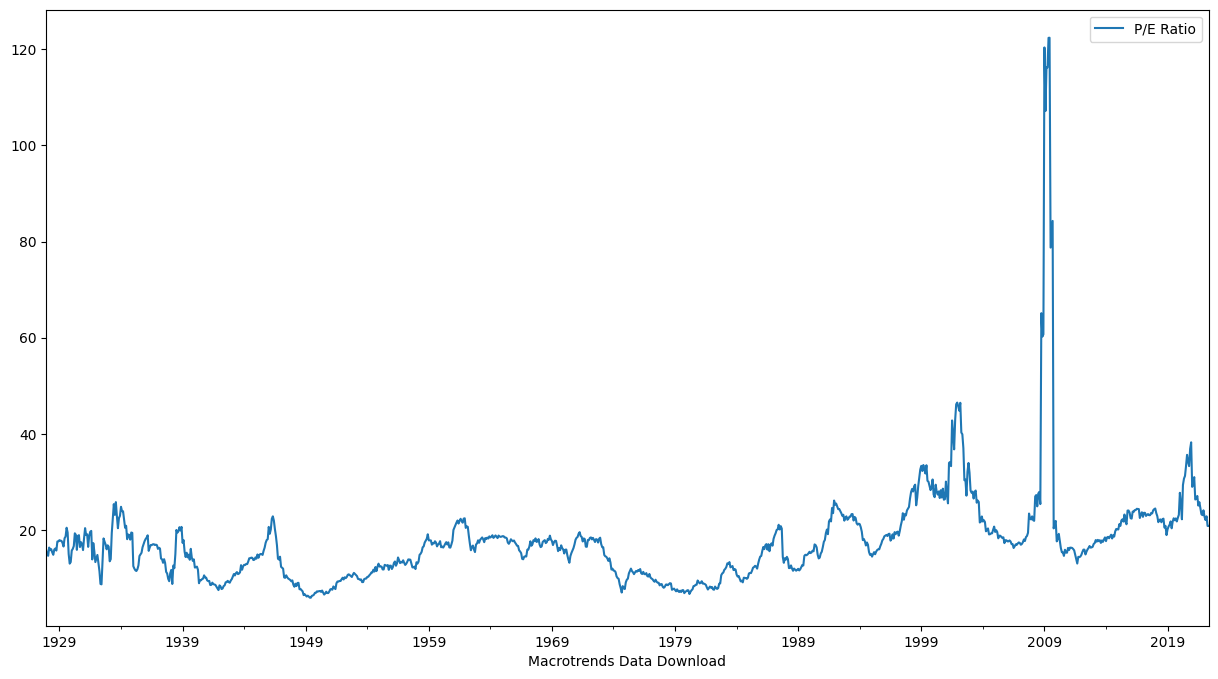

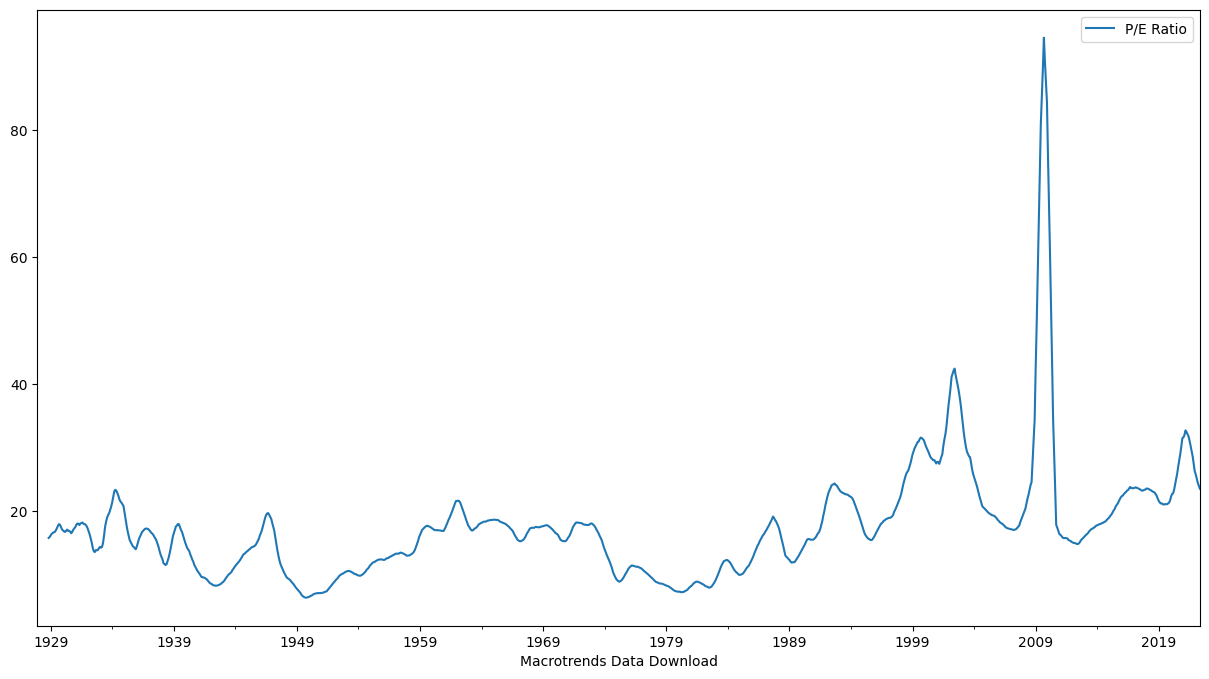

In [158]:
df_vals.plot(figsize=(15,8))
df_yr_mean.plot(figsize=(15,8))

In [159]:
df_vals['moving_skewness'] = df_vals[df_vals.columns[0]].rolling(window=60).apply(lambda x: skew(x, nan_policy='omit'))

In [160]:
df_vals

,P/E Ratio,moving_skewness
Macrotrends Data Download,,
1927-12-01,15.9099,NaN
1928-01-01,14.8898,NaN
1928-02-01,14.6271,NaN
1928-03-01,16.339,NaN
1928-04-01,15.8,NaN
...,...,...
2022-01-01,22.769,1.370773
2022-02-01,22.055,1.372277
2022-03-01,22.8439,1.374751


Text(0, 0.5, 'Moving Skewness')

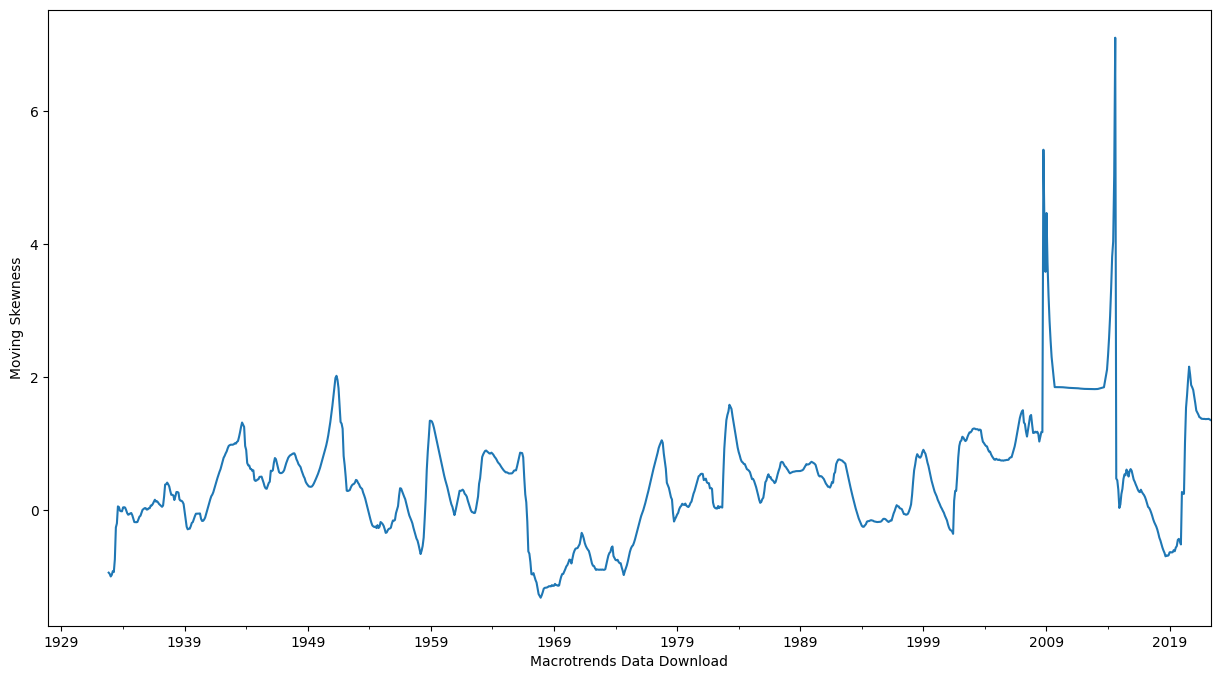

In [161]:
df_vals['moving_skewness'].plot(figsize=(15,8))
plt.ylabel('Moving Skewness')

In [162]:
df_vals['moving_kurtosis'] = df_vals['P/E Ratio'].rolling(window=60).apply(lambda x: kurtosis(x, nan_policy='omit'))
df_vals['moving_excess_kurtosis'] = df_vals['moving_kurtosis'] - 3  # Excess kurtosis is kurtosis - 3

Text(0, 0.5, 'Moving Kurtosis')

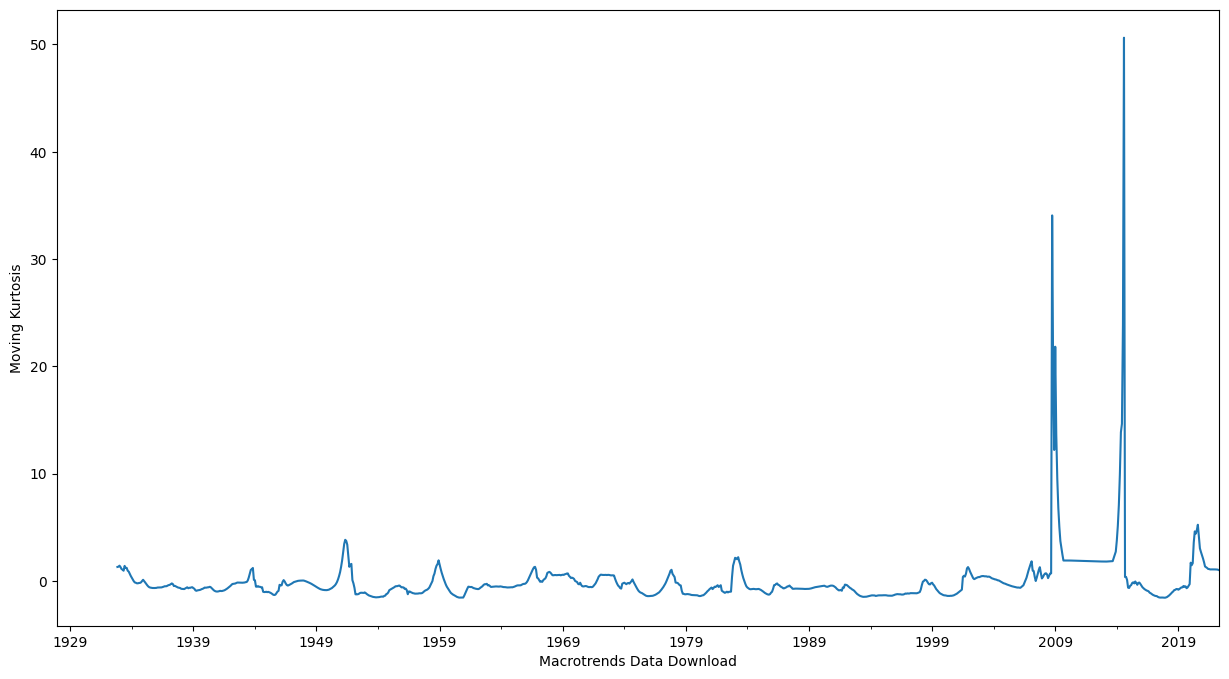

In [163]:
df_vals['moving_kurtosis'].plot(figsize=(15,8))
plt.ylabel('Moving Kurtosis')

Text(0, 0.5, 'Moving Excess Kurtosis')

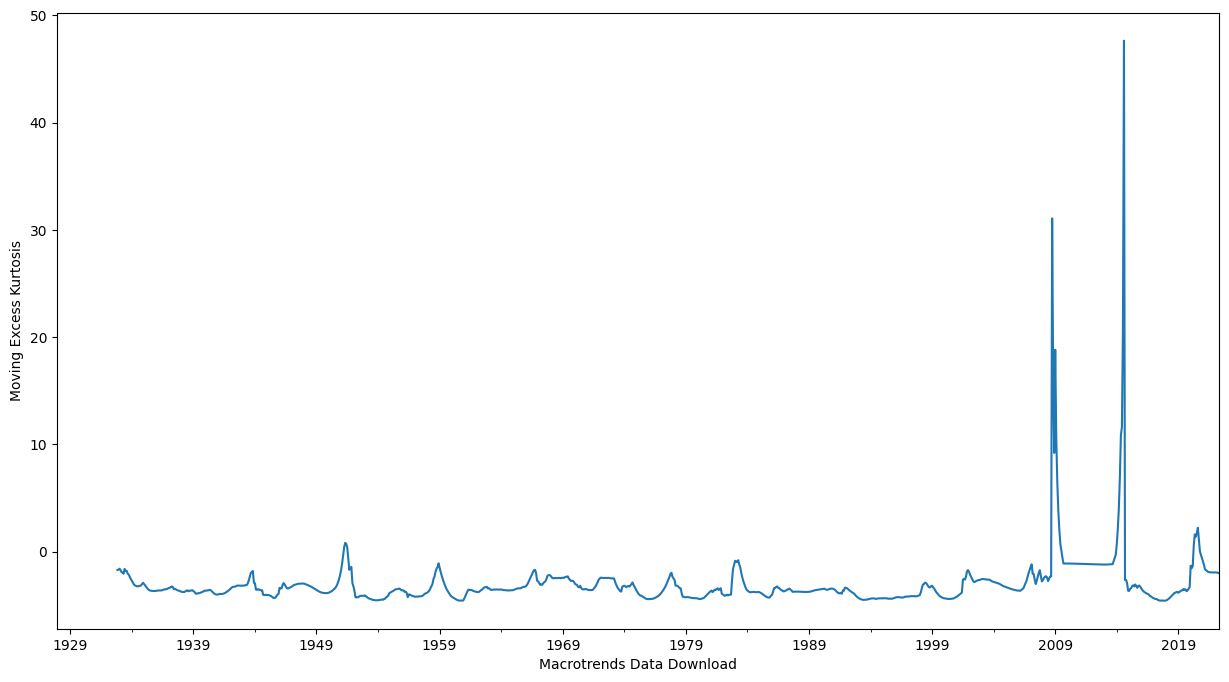

In [164]:
df_vals['moving_excess_kurtosis'].plot(figsize=(15,8))
plt.ylabel('Moving Excess Kurtosis')